<a href="https://colab.research.google.com/github/PremGorecki/DataScience/blob/main/07_uczenie_glebokie/03_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasyfikator wieloklasowy - Image Recognition
Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: Fashion MNIST

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.8.2'

Załadowanie danych i wstępna eksploracja

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

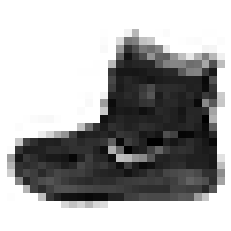

In [7]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

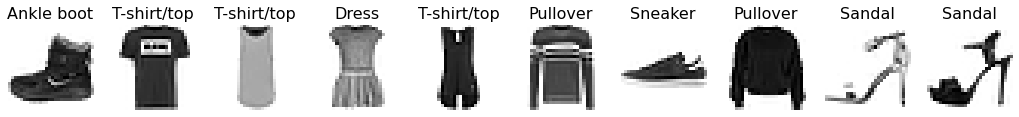

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [9]:
# standaryzacja danych wejściowych
X_train = X_train / 255.
X_test = X_test / 255.


In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

Budowa modelu

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2699 - accuracy: 0.9064 - val_loss: 0.3992 - val_accuracy: 0.8811
Epoch 2/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2640 - accuracy: 0.9087 - val_loss: 0.4210 - val_accuracy: 0.8799
Epoch 3/40
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2570 - accuracy: 0.9112 - val_loss: 0.4239 - val_accuracy: 0.8791
Epoch 4/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2553 - accuracy: 0.9114 - val_loss: 0.4337 - val_accuracy: 0.8838
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2486 - accuracy: 0.9158 - val_loss: 0.4240 - val_accuracy: 0.8820
Epoch 6/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2451 - accuracy: 0.9166 - val_loss: 0.4178 - val_accuracy: 0.8888
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2408 - accuracy: 0.9178 - val_loss: 0.4310 - val_accuracy:

In [16]:
# wrzucamy do DF dane

metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.269875,0.906375,0.399208,0.881083,0
1,0.264025,0.908750,0.421026,0.879917,1
2,0.257025,0.911250,0.423915,0.879083,2
3,0.255312,0.911354,0.433734,0.883750,3
4,0.248566,0.915750,0.424039,0.882000,4
5,0.245050,0.916562,0.417758,0.888833,5
6,0.240769,0.917813,0.430962,0.885083,6
7,0.237156,0.920187,0.481543,0.880917,7
8,0.232632,0.920875,0.487773,0.878917,8
9,0.225506,0.922792,0.452448,0.883333,9


Ocena modelu

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8747000098228455


Predykcja na podstawie modelu:
model.evaluate(y_true, y_pred) - pozwala obliczyć metryki modelu
model.predict_classes() - pozwala zwrócić odpowiednio przewidziane klasy
model.predict_proba(), model.predict() - pozwala zwrócić prawdopodobieństwo danej klasy

In [20]:
predictions = model.predict(X_test)
predictions

predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000722,0.000000,0.999271,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.590001,0.000000,0.000001,0.000000,0.000000,0.000000,0.409998,0.000000,0.000000,0.000000


In [22]:
predictions_cls=model.predict(X_test)
predictions_cls = np.argmax(predictions_cls,axis=1)

predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

Eksploracja predykcji

In [23]:
#@title Wybierz indeks zdjęcia:
idx = 3400 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

Błędnie sklasyfikowane obrazy

In [26]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 833 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)